Pixeltests School Data Science

*Unit 2, Sprint 3, Module 1*

---


# Define ML problems

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your decisions.

- [ ] Choose your target. Which column in your tabular dataset will you predict?
- [ ] Is your problem regression or classification?
- [ ] How is your target distributed?
    - Classification: How many classes? Are the classes imbalanced?
    - Regression: Is the target right-skewed? If so, you may want to log transform the target.
- [ ] Choose your evaluation metric(s).
    - Classification: Is your majority class frequency >= 50% and < 70% ? If so, you can just use accuracy if you want. Outside that range, accuracy could be misleading. What evaluation metric will you choose, in addition to or instead of accuracy?
    - Regression: Will you use mean absolute error, root mean squared error, R^2, or other regression metrics?
- [ ] Choose which observations you will use to train, validate, and test your model.
    - Are some observations outliers? Will you exclude them?
    - Will you do a random split or a time-based split?
- [ ] Begin to clean and explore your data.
- [ ] Begin to choose which features, if any, to exclude. Would some features "leak" future information?

If you haven't found a dataset yet, do that today. 

Some students worry, ***what if my model isn't “good”?*** Then, [produce a detailed tribute to your wrongness. That is science!](https://twitter.com/nathanwpyle/status/1176860147223867393)

In [66]:
import pandas as pd
encoding = 'unicode_escape'
df=pd.read_csv('/content/Corona db.csv',encoding='unicode_escape')
df.head(n=10)

,#,"Country,",Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,Total Tests,Tests/1M pop,Population
0,1.0,USA,"10,43,93,464",NaN,"11,35,341",NaN,"10,14,71,461",NaN,"17,86,662","3,406","3,11,804","3,391","1,16,04,08,714","34,65,921","33,48,05,269"
1,2.0,India,"4,46,82,895",NaN,"5,30,740",NaN,"4,41,50,372",NaN,"1,783",698,"31,766",377,"91,52,65,788","6,50,679","1,40,66,31,776"
2,3.0,France,"3,95,33,323",NaN,"1,64,286",NaN,"3,92,77,890",NaN,"91,147",869,"6,02,784","2,505","27,14,90,188","41,39,547","6,55,84,518"
3,4.0,Germany,"3,78,10,147",NaN,"1,66,016",NaN,"3,74,13,200",NaN,"2,30,931","1,281","4,50,745","1,979","12,23,32,384","14,58,359","8,38,83,596"
4,5.0,Brazil,"3,68,57,916",NaN,"6,97,248",NaN,"3,59,33,396",NaN,"2,27,272","8,318","1,71,151","3,238","6,37,76,166","2,96,146","21,53,53,593"
5,6.0,Japan,"3,26,33,741",NaN,"68,796",NaN,"2,15,76,391",NaN,"1,09,88,554",475,"2,59,854",548,"9,23,55,701","7,35,405","12,55,84,838"
6,7.0,S. Korea,"3,02,28,889","14,961","33,552",30.0,"2,97,87,513","14,108","4,07,824",339,"5,88,914",654,"1,58,04,065","3,07,892","5,13,29,899"
7,8.0,Italy,"2,54,53,789",NaN,"1,86,833",NaN,"2,50,14,986",NaN,"2,51,970",205,"4,22,380","3,100","26,54,78,247","44,05,344","6,02,62,770"
8,9.0,UK,"2,42,74,361",NaN,"2,04,171",NaN,"2,40,28,571","3,821","41,619",146,"3,54,381","2,981","52,25,26,476","76,28,357","6,84,97,907"
9,10.0,Russia,"2,19,67,983",NaN,"3,95,148",NaN,"2,13,62,029",NaN,"2,10,806","2,300","1,50,666","2,710","27,34,00,000","18,75,095","14,58,05,947"


In [67]:
target='Deaths/'

Regression

In [68]:
!pip install -r my_package.whl
!pip install my_package.whl



ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'my_package.whl'
ERROR: my_package.whl is not a valid wheel filename.


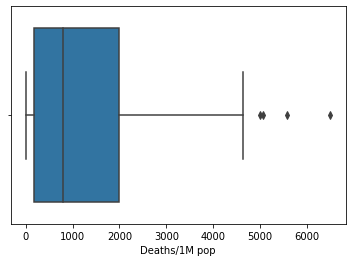

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots()

# ax.boxplot(########)
sns.boxplot(x="Deaths/1M pop",data=df,dodge=False)



In [78]:
df['Deaths/1M pop']=df['Deaths/1M pop'].astype('float') 


3.Data is right skewed.
4.Yes,there are few outliers.

In [119]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
X = df[['Population','Total Cases']]
Y = df['Deaths/1M pop']
X.head(10)


,Population,Total Cases
0,334805269,104393464.0
1,1406631776,44682895.0
2,65584518,39533323.0
3,83883596,37810147.0
4,215353593,36857916.0
5,125584838,32633741.0
6,51329899,30228889.0
7,60262770,25453789.0
8,68497907,24274361.0
9,145805947,21967983.0


In [151]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(X,Y,test_size =0.2)



,Population,Total Cases
111,374087,229687.0
207,17413580,7652.0


In [165]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(x_train,y_train)
predicted=clf.predict(x_test)
observed=3391
residual=observed-predicted
print('Our model predicts',predicted[0],'deaths','for total cases of',2.320000e+02,'the difference is',residual[0])

Our model predicts 1266.4716497171187 deaths for total cases of 232.0 the difference is 2124.5283502828815


In [168]:
from statsmodels.formula.api import ols

equation = 'Deaths/1M pop ~ Total Cases'

model = ols(equation, data=df).fit()

model.params[1]

SyntaxError: ignored

In [115]:
df1=df.describe(include='number')
df1


,#,Total Cases,New Deaths,Deaths/1M pop
count,232.000000,2.320000e+02,232.000000,232.000000
mean,115.500000,5.825409e+06,0.258621,1196.457759
std,67.116814,4.517670e+07,2.779394,1269.630758
min,0.000000,5.000000e+00,0.000000,0.000000
25%,57.750000,2.428800e+04,0.000000,133.750000
50%,115.500000,2.076305e+05,0.000000,754.500000
75%,173.250000,1.303440e+06,0.000000,1944.500000
max,231.000000,6.757475e+08,30.000000,6502.000000


In [117]:
df_new = df1[np.isfinite(df1).all(1)]
df_new

,#,Total Cases,New Deaths,Deaths/1M pop
count,232.000000,2.320000e+02,232.000000,232.000000
mean,115.500000,5.825409e+06,0.258621,1196.457759
std,67.116814,4.517670e+07,2.779394,1269.630758
min,0.000000,5.000000e+00,0.000000,0.000000
25%,57.750000,2.428800e+04,0.000000,133.750000
50%,115.500000,2.076305e+05,0.000000,754.500000
75%,173.250000,1.303440e+06,0.000000,1944.500000
max,231.000000,6.757475e+08,30.000000,6502.000000


In [107]:
df = df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)


In [102]:
df = df.replace([np.inf, -np.inf],np.nan)


In [101]:
import numpy as np


In [95]:
pd.set_option('mode.use_inf_as_na', True)


In [75]:
df['Total Cases']=df['Total Cases'].astype('float')

In [74]:
df['Deaths/1M pop']

0       3391
1        377
2       2505
3       1979
4       3238
       ...  
227      NaN
228        2
229      NaN
230      NaN
231    868.2
Name: Deaths/1M pop, Length: 232, dtype: object

In [73]:
df['Deaths/1M pop']=df['Deaths/1M pop'].str.replace(",","",regex=True)


In [72]:
df['Population']=df['Population'].str.replace(",","",regex=True)

In [71]:
df['Total Cases']=df['Total Cases'].str.replace(",","",regex=True)

In [94]:
df.fillna(0,inplace=True)

In [ ]:
df['Deaths/']=str(df['Deaths/'])

In [104]:
df.isnull().sum().sum()

0

In [139]:
df1

,#,Total Cases,New Deaths,Deaths/1M pop
count,232.000000,2.320000e+02,232.000000,232.000000
mean,115.500000,5.825409e+06,0.258621,1196.457759
std,67.116814,4.517670e+07,2.779394,1269.630758
min,0.000000,5.000000e+00,0.000000,0.000000
25%,57.750000,2.428800e+04,0.000000,133.750000
50%,115.500000,2.076305e+05,0.000000,754.500000
75%,173.250000,1.303440e+06,0.000000,1944.500000
max,231.000000,6.757475e+08,30.000000,6502.000000
